In [2]:
from environments import QuantumEnvironment
from environments import GRAPEApproximation
from qrla import QuantumRLAgent
from qrla import GRAPEQRLAgent
from input import *

/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/__init__.py:60: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < distutils.version.LooseVersion(required_tensorflow_version):
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)

# Define parameters 

In [5]:
number_of_qubits  = 2
drift_hamiltonian = h_d
control_hamiltonian = h_c
hamiltonian_labels = h_l
t_1 = t1
t_2 = t2
target_unitary = target_unitary_cnot
w_f = 0.8
w_e = 0.2
n_t = number_of_timesteps
T = gate_duration
n_g = number_of_grape_iterations
n_cycles = n_cycles
fc_layer_params_gqrl = (100, 100, 100)
fc_layer_params_qrl = (200, 100, 50, 30, 10)
replay_buffer_capacity_gqrl = 100
replay_buffer_capacity_qrl = 10
n_approx = 2000
n_qrl = 10000


# Initialize Environments

In [4]:
TrainingEnvironment = QuantumEnvironment(number_of_qubits,
                                         drift_hamiltonian,
                                         control_hamiltonian,
                                         hamiltonian_labels,
                                         t_1,
                                         t_2,
                                         target_unitary,
                                         w_f,
                                         w_e,
                                         n_t,
                                         T,
                                         n_g,
                                         n_cycles)

EvaluationEnvironment = QuantumEnvironment(number_of_qubits,
                                         drift_hamiltonian,
                                         control_hamiltonian,
                                         hamiltonian_labels,
                                         t_1,
                                         t_2,
                                         target_unitary,
                                         w_f,
                                         w_e,
                                         n_t,
                                         T,
                                         n_g,
                                         n_cycles)

TrainingEnvironmentGRAPE = GRAPEApproximation(number_of_qubits,
                                              drift_hamiltonian,
                                              control_hamiltonian,
                                              hamiltonian_labels,
                                              target_unitary,
                                              w_f,
                                              w_e,
                                              timesteps = n_t,
                                              grape_iterations = n_g)

EvaluationEnvironmentGRAPE = GRAPEApproximation(number_of_qubits,
                                              drift_hamiltonian,
                                              control_hamiltonian,
                                              hamiltonian_labels,
                                              target_unitary,
                                              w_f,
                                              w_e,
                                              timesteps = n_t,
                                              grape_iterations = n_g)

|████████████████████████████████████████| 499/499 [100%] in 21.5s (23.22/s) 
|████████████████████████████████████████| 499/499 [100%] in 21.1s (23.69/s) 


# Initialize Approximation Agent and Save Policy

In [6]:
ApproximationAgent = GRAPEQRLAgent(TrainingEnvironmentGRAPE,
                                   EvaluationEnvironmentGRAPE,
                                   n_approx,
                                   fc_layer_params = fc_layer_params_gqrl,
                                   replay_buffer_capacity = replay_buffer_capacity_gqrl)

ApproximationAgent.run_training()
ApproximationAgent.save_weights("GQRL_Policy")

/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:352: RuntimeWarning: invalid value encountered in cast
  self._minimum[self._minimum == -np.inf] = low
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:353: RuntimeWarning: invalid value encountered in cast
  self._minimum[self._minimum == np.inf] = high
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:355: RuntimeWarning: invalid value encountered in cast
  self._maximum[self._maximum == -np.inf] = low
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:356: RuntimeWarning: invalid value encountered in cast
  self._maximum[self._maximum == np.inf] = high


  0%|          | 0/2000 [00:00<?, ?it/s]

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=True)` instead.
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tfp.distributions.MultivariateNormalDiag_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "


# Initialize QRL agent Environment 

In [7]:
QRLAgent = QuantumRLAgent(TrainingEnvironment,
                          EvaluationEnvironment,
                          n_qrl,
                          w_f,
                          w_e,
                          fc_layer_params = fc_layer_params_qrl,
                          replay_buffer_capacity = replay_buffer_capacity_qrl,
                          policy = "GQRL_Policy",
                          rand_initial_state = True)

/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:352: RuntimeWarning: invalid value encountered in cast
  self._minimum[self._minimum == -np.inf] = low
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:353: RuntimeWarning: invalid value encountered in cast
  self._minimum[self._minimum == np.inf] = high
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:355: RuntimeWarning: invalid value encountered in cast
  self._maximum[self._maximum == -np.inf] = low
/Users/sebastiaanfauquenot/anaconda3/lib/python3.11/site-packages/tf_agents/specs/array_spec.py:356: RuntimeWarning: invalid value encountered in cast
  self._maximum[self._maximum == np.inf] = high


# Run QRL Agent Training

In [8]:
QRLAgent.run_training()

  0%|          | 0/10000 [00:00<?, ?it/s]

# Plot Results

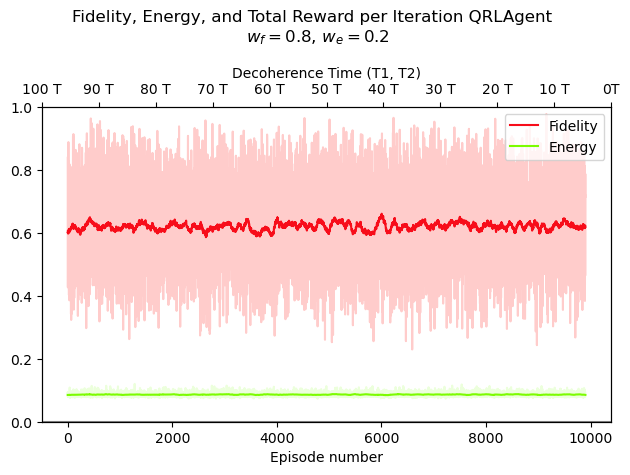

In [9]:
QRLAgent.plot_fidelity_energy_reward_per_iteration()